# Fatal Sharks Attacks in the past 25 years

1. <a href="#Exploration">Exploration</a>
    1. <a href="#Data-Import">Data Import & Basic Duplicates Removal</a>
    2. <a href="#Functions">Tools</a>
2. <a href="#Data-Cleaning">Data Cleaning</a>
    1. <a href="#Cleaning-the-column-names">Renaming Columns</a>
    2. <a href="#Column-Removals">Column Removal</a>
        1. <a href="#Missing-Rate">Missing Value Percentage</a>
        2. <a href="#Dropping-Irrelevant-Columns">Irrelevance</a>
    3. <a href="#Empty-Rows">Empty Rows</a>
    4. <a href="#Incorrect-Values">Incorrect Values</a>
        1. <a href="#Sex">Sex</a>
        2. <a href="#Fatal">Fatal</a>
    5. <a href="#Missing-Values">Missing Values</a>
        1. <a href="#Year">Year</a><br>
    6. <a href="#Text-Cleaning">Text Cleaning</a>
        1. <a href="#Type">Type</a>
        2. <a href="#Country">Country</a>
        3. <a href="#Activity">Activity</a>
        4. <a href="#Species">Species</a>
3. <a href="#Play">Preliminary Display of Data</a>


In [1]:
# Import the packages/modules required
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import re
sns.set()
import kaggle

## Data Import

In [3]:
!kaggle datasets download -d teajay/global-shark-attacks --unzip


  0%|          | 0.00/548k [00:00<?, ?B/s]
100%|##########| 548k/548k [00:00<00:00, 12.0MB/s]


In [4]:
# import csv file
df = pd.read_csv('attacks.csv', sep=",", encoding = "latin1", engine='python')

In [5]:
# Dropping duplicate rows of data
def del_dup(df):
    before = df.shape[0]
    df.drop_duplicates(inplace=True)
    after = df.shape[0]
    print(f"""{before-after} duplicated rows are removed.""")

In [6]:
del_dup(df)

19411 duplicated rows are removed.


## Exploration

In [7]:
def des_col(df):
    x = {i:df[i].nunique() for i in df.columns}
    print(f"""Current column names and its number of unique values:""") 
    for i, j in x.items():
        print(f"""{i}: {j}""")

In [8]:
def explore(df):
    print(f"""There are {df.shape[0]} rows and {df.shape[1]} columns in the data set.

Below are the information on the columns with its number of non-null values and the data type:
""")
    display(df.info())
    des_col(df)

In [9]:
explore(df)

There are 6312 rows and 24 columns in the data set.

Below are the information on the columns with its number of non-null values and the data type:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6312 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6310 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 

None

Current column names and its number of unique values:
Case Number: 6287
Date: 5433
Year: 249
Type: 8
Country: 212
Area: 825
Location: 4108
Activity: 1532
Name: 5230
Sex : 6
Age: 157
Injury: 3737
Fatal (Y/N): 8
Time: 366
Species : 1549
Investigator or Source: 4969
pdf: 6291
href formula: 6290
href: 6285
Case Number.1: 6285
Case Number.2: 6286
original order: 6308
Unnamed: 22: 1
Unnamed: 23: 2


__Actions:__
1. Delete columns that have little non-null values, use a function to drop columns with high missing value percentage:
    - "Unnamed: 22"
    - "Unnamed: 23"
<br>   
2. Missing values:
    - "Time" more than half of the data are missing, is it useful for analysis?
    - "Age" a lot are missing, is it useful for analysis?
<br> 
3. Data types:
    - "Date", "Year", "Time" can be expected as datetime data type
    - "Age" is expected to be a numerical value
    - "Fatal" to be in a boolean data type for Y/N
<br>
4. Incorrect values:
    - "Sex" can be expected with output such as M/F/Non-specified
    - "Fatal" to be expected as Y/N values
<br>
5. Text Cleansing:
    - "Area", "Country", "Activity", "Injury", "Species"
    - "Location" a lot of variation in value, may take too long to clean
<br>
6. Further exploration to check if other columns yield any useful information
<br>
7. Column names need to be cleansed to remove spaces, and standardized lower case for ease of typing :)
    - "Sex "
    - "Species "


In [10]:
def further_look(df):
    display(df.head())

In [11]:
further_look(df)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


__Actions:__
1. "Case Number", "Case Number.1", "Case Number.2", "original order" does it provide clues on missing "Date" / "Year"?
2. "Location" is it too specific if data is all across the world?
3. "Type" is subject to text cleansing
4. Columns to be dropped due to irrelevance to analysis:
    - "Name" - check exploration to check if contains any useful information
    - "Investigator or Source"
    - "href formula"
    - "href"
    - "Location"
    - "Area"

### Functions

In [12]:
# Display the value and the frequency in a column
def value_freq(df, col):
    print(f"""The value and its frequency in the {col} column:
{df[col].value_counts()}""")

In [13]:
# Display column information
def des_cat_col(df, col):
    value_freq(df, col)
    print(f"""The {col} column contains {df[col].isna().sum()} missing values.""")

In [14]:
# Stripping the column and taking the first letter as value, typically for M/F or Y/N columns
def clean_initial(df, col):
    df[col] = df[col].str.strip('^\w+$ \t.,%?></~#`¬!£$&*\]\[\}\{\"0123456789').str[0].str.upper()

In [15]:
def clean(df, col):
    df[col] = df[col].str.strip("^\t\w+$ .,%?></~#'`¬!£$&*\]\[\}\{")
    confirm = True
    while confirm:
        try:
            ans = input("Want to strip numbers? (Y/N) ").title()[0]
        except:
            print(f"""Please input as Y/N """)
        else:
            if ans == "Y":
                df[col] = df[col].str.strip('0123456789 "')
            confirm = False


In [16]:
# Remove any numbers and '",.-_/ from the value
def removenum(df, col):
    df[col] = df[col].str.replace("1", "")
    df[col] = df[col].str.replace("2", "")
    df[col] = df[col].str.replace("3", "")
    df[col] = df[col].str.replace("4", "")
    df[col] = df[col].str.replace("5", "")
    df[col] = df[col].str.replace("6", "")
    df[col] = df[col].str.replace("7", "")
    df[col] = df[col].str.replace("8", "")
    df[col] = df[col].str.replace("9", "")
    df[col] = df[col].str.replace("0", "")
    df[col] = df[col].str.replace("'", "")
    df[col] = df[col].str.replace('"', "")
    df[col] = df[col].str.replace(',', " ")
    df[col] = df[col].str.replace('.', " ")
    df[col] = df[col].str.replace('_', " ")
    df[col] = df[col].str.replace('-', " ")
    df[col] = df[col].str.replace('/', " ")
    df[col] = df[col].str.replace('?', " ")
    df[col] = df[col].str.replace('!', " ")
    df[col] = df[col].str.replace('#', " ")
    df[col] = df[col].str.replace('*', " ")
    df[col] = df[col].str.replace('^', " ")
    df[col] = df[col].str.replace('£"', " ")
    df[col] = df[col].str.replace('$', " ")
    df[col] = df[col].str.replace('%', " ")

In [17]:
def replace_contain(df, col, contain, case, value):
    df.loc[df[col].str.contains(contain, case=case), col]=value

## Data Cleaning
### Clearning the column names

In [18]:
def clean_cols(df):
    print(f"""Original column names:
{df.columns}""")
    cols=[i.lower().strip(r'^\w+$ ').replace(" ", "_") for i in df.columns]
    df.columns=cols
    print(f"""Now renamed to:
{df.columns}""")

In [19]:
clean_cols(df)

Original column names:
Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')
Now renamed to:
Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')


### Column Removals
#### Missing Rate

In [20]:
# function to delete columns based on the indicated missing value percentage threshold
def drop_missingrate(df):
    print(f"""There are currently:
{df.shape[0]} rows and {df.shape[1]} columns""")
    drop_perc = round(df.isnull().sum()[df.isnull().sum() > 0]/df.shape[0]*100,2)
    print(f"""The columns with missing values percentages: 
{drop_perc}
""")
    ask = True
    while ask:
        try:
            missing_perc = float(input("""Please indicate the missing value percentage threshold (60%-100%)
e.g. for 60%, please input as 60 
"""))
        except:
            print("You have input an incorrect format")
        else:
            if missing_perc >= 60:
                ask = False
            else:
                print("Recommended missing value percentage is between 60% - 100%")
    
    drop_cols = drop_perc[drop_perc>missing_perc].index
    
    print(f"""The columns recommended to be removed due to having more than {missing_perc}% missing value:
{drop_cols}""")
    confirm = True
    while confirm:
        try:
            ans = input("Would you like to remove these columns? (Y/N) ").title()[0]
        except:
            print(f"""Please input as Y/N """)
        else:
            if ans == "Y":
                df.drop(drop_cols, axis=1, inplace=True)
                print(f"""After removing columns with more than {missing_perc}% missing values, there are:
{df.shape[0]} rows and {df.shape[1]} columns.
The missing value count for each column:""")
                display(df.isnull().sum())
            confirm = False

In [21]:
drop_missingrate(df)

There are currently:
6312 rows and 24 columns
The columns with missing values percentages: 
case_number                0.03
date                       0.16
year                       0.19
type                       0.22
country                    0.95
area                       7.37
location                   8.71
activity                   8.78
name                       3.49
sex                        9.11
age                       45.01
injury                     0.60
fatal_(y/n)                8.70
time                      53.30
species                   45.12
investigator_or_source     0.43
pdf                        0.16
href_formula               0.17
href                       0.16
case_number.1              0.16
case_number.2              0.16
original_order             0.05
unnamed:_22               99.98
unnamed:_23               99.97
dtype: float64

Please indicate the missing value percentage threshold (60%-100%)
e.g. for 60%, please input as 60 
60
The columns recommend

case_number                  2
date                        10
year                        12
type                        14
country                     60
area                       465
location                   550
activity                   554
name                       220
sex                        575
age                       2841
injury                      38
fatal_(y/n)                549
time                      3364
species                   2848
investigator_or_source      27
pdf                         10
href_formula                11
href                        10
case_number.1               10
case_number.2               10
original_order               3
dtype: int64

Although not yet reach the missing value percentage threshold, it is good to note that "age", "time", "species" contains high percentage of missing values.

#### Dropping Irrelevant Columns

In [22]:
# Declare columns to be removed
del_col= ["href", "investigator_or_source", "href_formula", "location", "area"]
df.drop(columns=del_col, inplace=True)

Re-examine each column and its number of unique value to focus on the 

In [23]:
des_col(df)

Current column names and its number of unique values:
case_number: 6287
date: 5433
year: 249
type: 8
country: 212
activity: 1532
name: 5230
sex: 6
age: 157
injury: 3737
fatal_(y/n): 8
time: 366
species: 1549
pdf: 6291
case_number.1: 6285
case_number.2: 6286
original_order: 6308


### Empty Rows

In [39]:
# Remove rows considered to be empty based on how many values are missing per row
def empty_rows(df):
    print(f"""The dataframe has {len(df.columns)} columns.""")
    input_col = True
    while input_col:
        try:
            n_col = int(input("Please indicate the missing value threshold for each row: "))
        except:
            print(f"""Please input as a number i.e 8""")
        else:
            input_col=False
    n_rows = df[df.apply(lambda x: x.isna().sum(), axis=1)>12].shape[0]
    confirm = True
    print(f"""There are {n_rows} rows considered to be empty rows.""")
    while confirm:
        try:
            ans = input("Would you like to remove the rows? (Y/N) ").title()[0]
        except:
            print(f"""Please input Y/N """)
        else:
            if ans =="Y":
                df.dropna(thresh=n_col, inplace=True)
                print(f"""{n_rows} rows are removed.""")
            confirm = False

In [40]:
# Removing rows with more than 12 missing values
empty_rows(df)

The dataframe has 17 columns.


Please indicate the missing value threshold for each row:  12


There are 10 rows considered to be empty rows.


Would you like to remove the rows? (Y/N)  y


10 rows are removed.


### Incorrect Values
#### Sex

In [28]:
# Sex is usually input as "M"/"Male"/"F"/"Female" therefore first letter is after stripping is used.
def gender(df, col):
    gender=["M", "F"]
    value_freq(df, col)
    confirm = True
    while confirm:
        try:
            ans = input('Would you like to proceed to trimming the value to its first letter? (Y/N) ').title()[0]
        except:
            print(f"Please input as Y/N ")
        else:
            if ans == "Y":
                clean_initial(df, col)
            confirm = False
    confirm = True
    while confirm:
        try:
            ans = input('Would you like to replace values other than "M"/"F" to "Unknown"? (Y/N) ').title()[0]
        except:
            print(f"Please input as Y/N ")
        else:
            if ans == "Y":
                x = (df[col].isin(gender)==False).sum()
                df.loc[~(df[col].isin(gender)), col] = "Unknown"
                print(f'''{x} rows in column {col} has been updated to "Unknown"
''')
                value_freq(df,col)
            confirm = False
        

In [29]:
gender(df, "sex")

The value and its frequency in the sex column:
M      5094
F       637
N         2
M         2
lli       1
.         1
Name: sex, dtype: int64
Would you like to proceed to trimming the value to its first letter? (Y/N) y
Would you like to replace values other than "M"/"F" to "Unknown"? (Y/N) y
569 rows in column sex has been updated to "Unknown"

The value and its frequency in the sex column:
M          5096
F           637
Unknown     569
Name: sex, dtype: int64


In [30]:
# Data entry mistakes often occurs with "Sex" being store in the "Name" column
gender=["male", "female", "girl", "boy", "man", "woman", "men", "women"]
df.loc[(df['name'].str.lower().isin(gender))&(df['sex']=="Unknown"),['name','sex']]

,name,sex
2225,male,Unknown
3049,male,Unknown
3452,male,Unknown
4338,male,Unknown
4467,male,Unknown
6062,male,Unknown
6108,male,Unknown


In [31]:
# Fill in the missing info
df.loc[(df['name'].str.lower().isin(gender))&(df['sex']=="Unknown"),'sex']=df['name'].str[0].str.upper()
value_freq(df, "sex")

The value and its frequency in the sex column:
M          5103
F           637
Unknown     562
Name: sex, dtype: int64


#### Fatal

In [32]:
# Renaming the column to "fatal"
df.rename(columns={'fatal_(y/n)' : 'fatal'}, inplace=True)

In [33]:
def yes_no(df, col):
    yn = ["Y", "N"]
    value_freq(df, col)
    clean_initial(df, col)
    confirm = True
    while confirm:
        try:
            ans = input('Would you like to replace values other than "Y"/"N" to "Unknown"? (Y/N) ').title()[0]            
        except:
            print(f"Please input as Y/N ")
        else:
            if ans == "Y":
                x = (df[col].isin(yn)==False).sum()
                df.loc[~(df[col].isin(yn)), col] = "Unknown"
                print(f'''{x} rows in column {col} has been updated to "Unknown"
#''')
                value_freq(df,col)
            confirm = False

In [34]:
yes_no(df, "fatal")

The value and its frequency in the fatal column:
N          4293
Y          1388
UNKNOWN      71
 N            7
y             1
M             1
2017          1
N             1
Name: fatal, dtype: int64
Would you like to replace values other than "Y"/"N" to "Unknown"? (Y/N) y
612 rows in column fatal has been updated to "Unknown"
#
The value and its frequency in the fatal column:
N          4301
Y          1389
Unknown     612
Name: fatal, dtype: int64


In [35]:
# "injury" may provide the missing data on fatality
df[df["injury"].map(lambda x: isinstance(x, str) and "fatal" in x.lower())].injury.to_dict();

In [36]:
# "injury" may provide the missing data on fatality
df[df["injury"].map(lambda x: isinstance(x, str) and "death" in x.lower())].injury.to_dict();

In [37]:
# update missing values
df.fatal[df["injury"].map(lambda x: isinstance(x, str) and "fatal" in x.lower())]='Y'
df.fatal[df["injury"].map(lambda x: isinstance(x, str) and "death" in x.lower())]='Y'

<ipython-input-37-dd756b2e65eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fatal[df["injury"].map(lambda x: isinstance(x, str) and "fatal" in x.lower())]='Y'
<ipython-input-37-dd756b2e65eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fatal[df["injury"].map(lambda x: isinstance(x, str) and "death" in x.lower())]='Y'


## Missing Values
### Year

In [38]:
# All the values in "year" to examine
df.year.unique()

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [39]:
# Examine the number of missing values
df.year.isna().sum()

2

In [40]:
# Can "case_number" provide the missing info? (checking value against "case_number.1" and "case_number.2")
df[df.year.isna()][((df.case_number.str[:4])==((df['case_number.1']).str[:4])) & ((df.case_number.str[:4])==((df['case_number.2']).str[:4]))]

<ipython-input-40-7d56757e204c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.year.isna()][((df.case_number.str[:4])==((df['case_number.1']).str[:4])) & ((df.case_number.str[:4])==((df['case_number.2']).str[:4]))]


,case_number,date,year,type,country,activity,name,sex,age,injury,fatal,time,species,pdf,case_number.1,case_number.2,original_order
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",Unknown,NaN,Bull shark,2017.01.08.R-KerryDaniel.pdf,2017.01.08.R,2017.01.08.R,6116.0
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Swimming,a boy,M,NaN,FATAL,Y,NaN,NaN,1835.08.19.R-Whitehaven.pdf,1836.08.19.R,1836.08.19.R,224.0


Two of the missing value can be filled in with the information from "case_number"/"case_number.1"/"case_number.2"

In [41]:
# Update the missing values from the information of the other columns
x=df[df.year.isna()][((df.case_number.str[:4])==((df['case_number.1']).str[:4])) & ((df.case_number.str[:4])==((df['case_number.2']).str[:4]))]
df.loc[x.index, "year"]=df.case_number.str[:4]
df.year=pd.to_numeric(df['year'],errors='coerce')

<ipython-input-41-e77b917fc602>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x=df[df.year.isna()][((df.case_number.str[:4])==((df['case_number.1']).str[:4])) & ((df.case_number.str[:4])==((df['case_number.2']).str[:4]))]


In [42]:
# Examine the number of missing values
df.year.isna().sum()

0

Since the analysis only concerns with the shark activities in the past 25 years, any records before 1995 will be dropped

In [43]:
df.drop(df[df.year<1995].index, axis=0, inplace=True)

### Text Cleaning
#### Type

In [44]:
des_cat_col(df, "type")

The value and its frequency in the type column:
Unprovoked      1901
Invalid          192
Provoked         174
Boating           86
Boat              29
Sea Disaster      17
Questionable       2
Boatomg            1
Name: type, dtype: int64
The type column contains 2 missing values.


"Type" is a categorical data where it needs to be cleansed.

In [45]:
df['type']=df['type'].fillna("Unknown")
replace_contain(df, "type", "boat", False, "Boating")
df.loc[df['type'].isin(["Questionable", "Invalid"]), "type"] = "Unknown"
des_cat_col(df,"type")

The value and its frequency in the type column:
Unprovoked      1901
Unknown          196
Provoked         174
Boating          116
Sea Disaster      17
Name: type, dtype: int64
The type column contains 0 missing values.


#### Country

In [46]:
des_cat_col(df, "country")

The value and its frequency in the country column:
USA                     1180
AUSTRALIA                434
SOUTH AFRICA             173
BRAZIL                    78
BAHAMAS                   59
                        ... 
ARUBA                      1
NORTHERN ARABIAN SEA       1
Sierra Leone               1
ST. MAARTIN                1
Fiji                       1
Name: country, Length: 102, dtype: int64
The country column contains 2 missing values.


In [47]:
# Standardizing the country to uppercase and fill in the missing values
df['country']=df['country'].str.upper()
df['country']=df['country'].fillna("UNKNOWN")
removenum(df, "country")
clean(df,"country")
df['country']=df['country'].str.replace("  ", " ")

Want to strip numbers? (Y/N) 
Please input as Y/N 
Want to strip numbers? (Y/N) y


In [48]:
df[df['country'].str.contains("sea", case=False)]["country"].unique()

array(['ST HELENA BRITISH OVERSEAS TERRITORY', 'CARIBBEAN SEA',
       'NORTHERN ARABIAN SEA'], dtype=object)

In [49]:
# Interested in countries, not the sea, therefore removing these entries with "sea"
replace_contain(df, "country", "st helena", False, "ST HELENA")
replace_contain(df, "country", "sea", False, "UNKNOWN")

In [50]:
df[df['country'].str.contains("ocean", case=False)]["country"].unique()

array(['ATLANTIC OCEAN'], dtype=object)

In [51]:
# Interested in countries, not the ocean, therefore removing these entries with "ocean"
replace_contain(df, "country", "ocean", False, "UNKNOWN")

In [52]:
df[df['country'].str.contains("gulf", case=False)]["country"].unique()

array(['GULF OF ADEN'], dtype=object)

In [53]:
# Interested in countries, not the gulf, therefore removing these entries with "gulf"
replace_contain(df, "country", "gulf", False, "UNKNOWN")

In [54]:
df["country"].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'UNKNOWN', 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA', 'COMOROS', 'REUNION', 'FRENCH POLYNESIA',
       'UNITED KINGDOM', 'UNITED ARAB EMIRATES', 'PHILIPPINES',
       'INDONESIA', 'CHINA', 'COLUMBIA', 'CAPE VERDE', 'FIJI',
       'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE',
       'PUERTO RICO', 'ITALY', 'GREECE', 'ST MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITED ARAB EMIRATES (UAE)', 'AZORES',
       'SOUTH KOREA', 

In [55]:
# Clean other obvious entries 
df.loc[df['country']=="BETWEEN PORTUGAL & INDIA", "country"]="UNKNOWN"
df.loc[df['country']=="COAST OF AFRICA", "country"]="UNKNOWN"
df.loc[df['country']=="ST MAARTIN", "country"]="ST MARTIN"
df.loc[df['country']=="FEDERATED STATES OF MICRONESIA", "country"]="MICRONESIA"
df.loc[df['country']=="OKINAWA", "country"]="JAPAN"
df.loc[df['country']=="WESTERN SAMOA", 'country']="SAMOA"
df.loc[df['country']=="NEW BRITAIN", 'country']="PAPUA NEW GUINEA"
df.loc[df['country']=="EQUATORIAL GUINEA  CAMEROON", 'country']="UNKNOWN"
df.loc[df['country']=="AFRICA", 'country']="UNKNOWN"
df.loc[df['country']=="THE BALKANS", 'country']="UNKNOWN"
df.loc[df['country']=="SOLOMON ISLANDS  VANUATU", 'country']="UNKNOWN"
df.loc[df['country']=="CENTRAL PACIFIC", 'country']="UNKNOWN"
df.loc[df['country']=="BAY OF BENGAL", 'country']="UNKNOWN"
df.loc[df['country']=="ASIA", 'country']="UNKNOWN"
df.loc[df['country']=="IRAN  IRAQ", 'country']="UNKNOWN"
df.loc[df['country']=="ITALY  CROATIA", 'country']="UNKNOWN"
replace_contain(df, "country", "ceylon", False, "SRI LANKA")
replace_contain(df, "country", "tobago", False, "TRINIDAD AND TOBAGO")
replace_contain(df, "country", "andaman", False, "ANDAMAN AND NICOBAR ISLANDS")
replace_contain(df, "country", "emirates", False, "UNITED ARAB EMIRATES")
df.loc[df['country']=="BRITISH ISLES", 'country']="UNITED KINGDOM"
df.loc[df['country']=="SCOTLAND", 'country']="UNITED KINGDOM"
df.loc[df['country']=="ENGLAND", 'country']="UNITED KINGDOM"
replace_contain(df, "country", "west indies", False, "UNKNOWN")
df.loc[df['country']=="MALDIVE ISLANDS", 'country']="MALDIVES"
df.loc[df['country']=="KOREA", 'country']="SOUTH KOREA"
df.loc[df['country']=="PALESTINIAN TERRITORIES", 'country']="PALESTINIAN"
df.loc[df['country']=="EGYPT  ISRAEL", 'country']="UNKNOWN"
df.loc[df['country']=="TURKS & CAICOS", 'country']="TURKS AND CAICOS ISLANDS"
df.loc[df['country']=="CRETE", 'country']="GREECE"
replace_contain(df, "country", "reunion", False, "REUNION")
replace_contain(df, "country", "cayman", False, "CAYMAN ISLANDS")
df.loc[df['country']=="USA", 'country']="UNITED STATES"

In [56]:
# Formatting it to look better
df['country']=df['country'].str.title()
des_cat_col(df, "country")

The value and its frequency in the country column:
United States    1180
Australia         434
South Africa      173
Brazil             78
Bahamas            59
                 ... 
Greece              1
Kiribati            1
Nigeria             1
Diego Garcia        1
Aruba               1
Name: country, Length: 88, dtype: int64
The country column contains 0 missing values.


#### Activity

In [57]:
des_cat_col(df, "activity")

The value and its frequency in the activity column:
Surfing                      723
Swimming                     320
Spearfishing                 134
Fishing                      124
Wading                        84
                            ... 
Spearfishing/ filming          1
Fishing from a kayak           1
Petting a shark                1
Surfing / Wading               1
"Riding waves on a board"      1
Name: activity, Length: 370, dtype: int64
The activity column contains 113 missing values.


In [58]:
## The category of activities
category=["Swimming", "Wading", "Diving", "Fishing", "Unknown", "Others", "Surfing/Boarding",'Accident/Disaster', 'Boating/Sailing' ]
# Filling in missing values
display(df.activity.isna().sum())
df['activity']= df['activity'].fillna("Unknown")

113

In [59]:
# Text cleaning
replace_contain(df, "activity", "walk", False, "Wading")
replace_contain(df, "activity", "div", False, "Diving")
replace_contain(df, "activity", "ship", False, "Accident/Disaster")
replace_contain(df, "activity", "disaster", False, "Accident/Disaster")
replace_contain(df, "activity", "capsize", False, "Accident/Disaster")
replace_contain(df, "activity", "tsunami", False, "Accident/Disaster")
replace_contain(df, "activity", "bath", False, "Swimming")
df.loc[(df['activity'].str.contains("surf", case=False)) & ~(df['activity'].str.contains("fish", case=False)), "activity"]="Surfing/Boarding"
replace_contain(df, "activity", "snorkeling", False, "Swimming")
replace_contain(df, "activity", "boarding", False, "Surfing/Boarding")
df.loc[df.activity=="Attempting to remove fishing net from submerged object", "activity"]="Others"
replace_contain(df, "activity", "fishing", False, "Fishing")
replace_contain(df, "activity", "swimming", False, "Swimming")
replace_contain(df, "activity", "ski", False, "Surfing/Boarding")
replace_contain(df, "activity", "float", False, "Swimming")
replace_contain(df, "activity", "row", False, "Boating/Sailing")
replace_contain(df, "activity", "wad", False, "Wading")
replace_contain(df, "activity", "canoe", False, "Boating/Sailing")
replace_contain(df, "activity", "kayak", False, "Boating/Sailing")
replace_contain(df, "activity", "padd", False, "Surfing/Boarding")
replace_contain(df, "activity", "fell", False, "Accident/Disaster")
replace_contain(df, "activity", "sink", False, "Accident/Disaster")
replace_contain(df, "activity", "stand", False, "Wading")
replace_contain(df, "activity", "yacht", False, "Boating/Sailing")
replace_contain(df, "activity", "crab", False, "Fishing")
replace_contain(df, "activity", "shrimp", False, "Fishing")
replace_contain(df, "activity", "lobster", False, "Fishing")
replace_contain(df, "activity", "kaka", False, "Surfing/Boarding")
replace_contain(df, "activity", "plung", False, "Accident/Disaster")
replace_contain(df, "activity", "adrift", False, "Accident/Disaster")
replace_contain(df, "activity", "sail", False, "Boating/Sailing")
replace_contain(df, "activity", "tread", False, "Wading")
replace_contain(df, "activity", "hik", False, "Wading")
replace_contain(df, "activity", "knnel", False, "Wading")
replace_contain(df, "activity", "SUP", False, "Surfing/Boarding")

In [60]:
# Examine what is left
df[~(df['activity'].isin(category))]["activity"].unique(), df[~(df['activity'].isin(category))]["activity"].nunique()

(array(['Feeding sharks', 'Cleaning fish', 'Touching a shark',
        'Attempting to lasso a shark', 'Photo shoot', 'Washing hands',
        'Grabbing shark for a selfie', 'Tagging sharks', 'Teasing a shark',
        'Feeding stingrays?', 'Photographing fish', 'Playing in the water',
        'Playing', 'Attempting to rescue a shark',
        'Photographing the shark', 'Hand feeding sharks',
        'Sitting in the water', 'Filming', 'Feeding fish',
        'Playing with an air mattress', 'Petting a shark',
        'Kneeling in the water', 'Shark watching', 'Filming a documentary',
        'Casting a net', 'Wrangling a shark',
        'Attempting to free the shark',
        'Dragging stranded shark into deeper water',
        'Attempting to rescue an injured & beached shark',
        'Jumping in the waves', 'Washing sand off a speared fish',
        'Attempting to fix motor', 'Rescuing', 'Measuring sharks',
        'Washing his feet', 'Crawling',
        "Accidentally stood on hooked s

In [61]:
# Putting the remaining as "Others"
df.loc[~(df['activity'].isin(category)), "activity"]="Others"

In [62]:
df["activity"].value_counts()

Surfing/Boarding     980
Swimming             458
Fishing              354
Diving               164
Wading               158
Unknown              116
Others                95
Boating/Sailing       50
Accident/Disaster     29
Name: activity, dtype: int64

#### Species 

In [63]:
def fullclean(df, col):
    df[col] = df[col].str.strip(""" -_^\w+$.,%?></~#\'`¬!£$&*0123456789\[\]""")
    df[col] = df[col].str.strip(''' -_^\w+$.,%?></~#\"`¬!£$&*0123456789\[\]''')

In [64]:
# Stripping the unwanted characters
fullclean(df, "species")
removenum(df, "species")

In [65]:
# Dealing with missing values
print(f"Missing values: {df.species.isna().sum()}")
# Missing values as "Missing"
df['species'] = df['species'].fillna("Missing")

Missing values: 828


In [66]:
# Stripping those starts or ends with "m", "to", "lb"
df.loc[df['species'].str.startswith("m "), "species"]=df['species'].str.strip(''' -_mM^\w+$.,%?></~#\"`¬!£$&*0123456789\[\]''')
df.loc[df['species'].str.endswith(" m"), "species"]=df['species'].str.strip(''' -_mM^\w+$.,%?></~#\"`¬!£$&*0123456789\[\]''')
fullclean(df, "species")
df.loc[df['species'].str.startswith("to "), "species"]=df['species'].str.strip(''' -_to^\w+$.,%?></~#\"`¬!£$&*0123456789\[\]''')
df.loc[df['species'].str.endswith(" to"), "species"]=df['species'].str.strip(''' -_to^\w+$.,%?></~#\"`¬!£$&*0123456789\[\]''')
fullclean(df, "species")
df.loc[df['species'].str.startswith("lb "), "species"]=df['species'].str.strip(''' -_lb^\w+$.,%?></~#\"`¬!£$&*0123456789\[\]''')
df.loc[df['species'].str.endswith(" lb"), "species"]=df['species'].str.strip(''' -_lb^\w+$.,%?></~#\"`¬!£$&*0123456789\[\]''')
fullclean(df, "species")

In [67]:
# "Unknown", "Suspect", "Unidentified" as "Missing"
replace_contain(df, "species", "unknown", False, "Missing")
replace_contain(df, "species", "suspect", False, "Unconfirmed")
replace_contain(df, "species", "unident", False, "Missing")
replace_contain(df, "species", "y Dr. D.P. L. Schultz; mako shark", False, "Shark")
replace_contain(df, "species", "Tiger sharks & ", False, "Shark")
replace_contain(df, "species", "unsome drowned but ", False, "Unconfirmed")
replace_contain(df, "species", "Said to involve a 1 m  white shark, but thought  that it was more likely a blue shar", False, "Shark")
replace_contain(df, "species", " or ", False, "Shark")

In [68]:
# "Unconfirmed" for entries that are not confirmed to have involved a shark
replace_contain(df, "species", "filmed by divers", False, "Unconfirmed")
replace_contain(df, "species", "not confirmed", False, "Unconfirmed")
replace_contain(df, "species", "invalid", False, "Unconfirmed")
replace_contain(df, "species", "unconfirmed", False, "Unconfirmed")
replace_contain(df, "species", "question", False, "Unconfirmed")
replace_contain(df, "species", "stingray", False, "Unconfirmed")
replace_contain(df, "species", "sea lion", False, "Unconfirmed")
replace_contain(df, "species", "no shark", False, "Unconfirmed")
replace_contain(df, "species", "eel", False, "Unconfirmed")
replace_contain(df, "species", "doubt", False, "Unconfirmed")
replace_contain(df, "species", "drown", False, "Unconfirmed")
replace_contain(df, "species", "hoax", False, "Unconfirmed")
replace_contain(df, "species", "to be determined", False, "Unconfirmed")
replace_contain(df, "species", "true", False, "Unconfirmed")
replace_contain(df, "species", "involvement not c", False, "Unconfirmed")
replace_contain(df, "species", "autheticated", False, "Unconfirmed")
replace_contain(df, "species", "barracuda", False, "Unconfirmed")
replace_contain(df, "species", "involvement prior", False, "Unconfirmed")
replace_contain(df, "species", "debris", False, "Unconfirmed")

In [69]:
# Reef Sharks
replace_contain(df, "species", "caribbean reef shark", False, "Caribbean Reef Shark")
replace_contain(df, "species", "blacktip reef shark", False, "Blacktip Reef Shark")
replace_contain(df, "species", "whitetip reef shark", False, "Whitetip Reef Shark")
replace_contain(df, "species", "white-tipped reef shark", False, "Whitetip Reef Shark")
replace_contain(df, "species", "grey reef shark", False, "Grey Reef Shark")
replace_contain(df, "species", "gray reef shark", False, "Grey Reef Shark")
replace_contain(df, "species", "blacktail reef shark", False, "Blacktail Reef Shark")
replace_contain(df, "species", "Reef shark", True, "Reef Shark")
replace_contain(df, "species", "reef shark", True, "Reef Shark")
# Sand Sharks
replace_contain(df, "species", "sand shark", False, "Sand Shark")
replace_contain(df, "species", "raggedtooth shark", False, "Sand Shark")
replace_contain(df, "species", "sandtiger", False, "Sand Tiger Shark")
replace_contain(df, "species", "grey nurse shark", False, "Sand Tiger Shark")
# Lemon Sharks
replace_contain(df, "species", "lemon", False, "Lemon Shark")
# Sandbar Sharks
replace_contain(df, "species", "sandbar", False, "Sandbar Shark")
replace_contain(df, "species", "brown", False, "Sandbar Shark")
# Copper Sharks
replace_contain(df, "species", "bronze", False, "Copper Shark")
replace_contain(df, "species", "copper", False, "Copper Shark")
# White Sharks
replace_contain(df, "species", "white shark", False, "White Shark")
replace_contain(df, "species", "hite shark", False, "White Shark")
# Hammerhead Sharks
replace_contain(df, "species", "hammerhead", False, "Hammerhead Shark")
# Tiger Sharks
df.loc[(df['species'].str.contains("tiger shark", case=False))&(df.species!="Sand Tiger Shark"), "species"] = "Tiger Shark"
# Oceanic Whitetip Sharks
replace_contain(df, "species", "oceanic", False, "Oceanic Whitetip Shark")
# Spinner Sharks
replace_contain(df, "species", "spinner", False, "Spinner Shark")
# Blue Sharks
replace_contain(df, "species", "blue", False, "Blue Shark")
# Bull Sharks
replace_contain(df, "species", "bull", False, "Bull Shark")
replace_contain(df, "species", "zam", False, "Bull Shark")
replace_contain(df, "species", "leucas", False, "Bull Shark")
# Salmon Sharks
replace_contain(df, "species", "salmon", False, "Salmon Shark")
# Silky Sharks
replace_contain(df, "species", "silk", False, "Silky Shark")
# Sevengill Sharks
replace_contain(df, "species", "broad", False, "Broadnose Sevengill Shark")
df.loc[(df['species'].str.contains("seven", case=False))&(df.species!="Broadnose Sevengill Shark"), "species"] = "Sevengill Shark"
# Smooth-hound
replace_contain(df, "species", "star", False, "Starry Smooth-hound")
df.loc[(df['species'].str.contains("smooth", case=False))&(df.species!="Starry Smooth-hound"), "species"] = "Smooth-hound"
# Dusky Sharks
replace_contain(df, "species", "dusk", False, "Dusky Shark")
# Tawny Nurse Sharks
replace_contain(df, "species", "tawn", False, "Tawny Nurse Shark")
# Nurse Sharks
df.loc[(df['species'].str.contains("nurse", case=False))&(df.species!="Tawny Nurse Shark"), "species"] = "Nurse Shark"
# Galapagos Sharks
replace_contain(df, "species", "gala", False, "Galapagos Shark")
# Porbeagle Sharks
replace_contain(df, "species", "porbe", False, "Porbeagle Shark")
# Port Jackson Sharks
replace_contain(df, "species", "port", False, "Port Jackson Shark")
# Wobbegong Sharks
replace_contain(df, "species", "wobb", False, "Wobbegong Shark")
# Cookiecutter Sharks
replace_contain(df, "species", "cookie", False, "Cookiecutter Shark")
# Basking Sharks
replace_contain(df, "species", "bask", False, "Basking Shark")
# Goblin Sharks
replace_contain(df, "species", "gob", False, "Goblin Shark")
# Leopard Sharks
replace_contain(df, "species", "leo", False, "Leopard Shark")
# Cow Sharks
replace_contain(df, "species", "cow", False, "Cow Shark")
# Thresher Sharks
replace_contain(df, "species", "thresher", False, "Thresher Shark")
# Angel Sharks
replace_contain(df, "species", "angel", False, "Angel Shark")
# School Sharks
replace_contain(df, "species", "soup", False, "School Shark")
# Longfin Mako Sharks
replace_contain(df, "species", "longfin", False, "Longfin Mako Shark")
# Shortfin Mako Sharks
replace_contain(df, "species", "longfin", False, "Shortfin Mako Shark")
# Mako Sharks
df.loc[(df['species'].str.contains("ako", case=False))&(df.species!="Longfin Mako Shark")&(df.species!="Shortfin Mako Shark"), "species"] = "Mako Shark"
# Small-spotted Catsharks
replace_contain(df, "species", "canicula", False, "Small-spotted Catshark")
# Blacktip Sharks
df.loc[(df['species'].str.contains("black", case=False))&(df.species!="Blacktip Reef Shark"), "species"] = "Blacktip Shark"
# Spurdog
replace_contain(df, "species", "dogfish", False, "Spurdog")
# Catsharks
replace_contain(df, "species", "small cat", False, "Catshark")


In [70]:
category = ["Missing", "Unconfirmed", "Caribbean Reef Shark", "Whitetip Reef Shark", "Grey Reef Shark", "Salmon Shark", "Blacktip Shark", "Catshark", "Blacktip Reef Shark", "Blacktail Reef Shark", "Reef Shark", "Sand Tiger Shark", "Sand Shark", "Sandbar Shark", "Lemon Shark", "Copper Shark", "White Shark", "Hammerhead Shark", "Tiger Shark", "Oceanic Whitetip Shark", "Spinner Shark", "Blue Shark", "Bull Shark", "Silky Shark", "Broadnose Sevengill Shark", "Sevengill Shark", "Starry Smooth-hound", "Smooth-hound", "Dusky Shark", "Tawny Nurse Shark", "Nurse Shark", 'Galapagos Shark', "Basking Shark", "Port Jackson Shark", "Porbeagle Shark", "Wobbegong Shark", "Cookiecutter Shark", "Goblin Shark", "Leopard Shark", "Cow Shark", "Thresher Shark", "Angel Shark", "School Shark", "Longfin Mako Shark", "Shortfin Mako Shark", "Mako Shark", "Small-spotted Catshark", "Spurdog"]

In [71]:
df[~(df.species.isin(category))]["species"].unique()

array(['shark', 'small shark', 'A small shark', 'a small shark',
       'juvenile shark', 'Shark', 'm shark', 'foot shark', 'tp  shark',
       'metre shark', 'gill shark', 'small sharks', 'kg shark', '',
       'Said to involve a   m shark', 'shark   kg shark T', 'to',
       'On    anglers from New Zealand caught a   m []   kg [ lb] shark at the same spot  It was believed this was the same shark that killed Alysha',
       'm [ to ] shark', 'sharks', 'grey colored shark', 'cm [ ]  shark',
       'A \x93small\x94 shark',
       'cm to  cm [ to ] bite diameter just below left knee',
       'cm [] captive shark', 'm [ to ] grey colored shark',
       'm [ to ] shark; Tooth fragment recovered from hand', '\xa0',
       'haler shark', 'm [  to ] shark', 'cm to  cm [ to ] shark',
       'A  shark was seen in the area by witnesses', 'm [   to  ] shark',
       'm [ to ] shark seen in the vicinity', 'a young shark',
       'm [ to ]   shark', 'Two   m to   m [ to ] sharks'], dtype=object)

In [72]:
# Others with sharks are renamed as "Shark"
df.loc[~(df.species.isin(category)), "species"] = "Shark"

In [73]:
des_cat_col(df, "species")

The value and its frequency in the species column:
Missing                      841
Shark                        452
White Shark                  276
Unconfirmed                  183
Bull Shark                   141
Tiger Shark                  133
Blacktip Shark                43
Copper Shark                  38
Nurse Shark                   27
Sand Shark                    25
Wobbegong Shark               25
Mako Shark                    23
Sand Tiger Shark              19
Lemon Shark                   19
Oceanic Whitetip Shark        16
Spinner Shark                 16
Reef Shark                    12
Grey Reef Shark               12
Caribbean Reef Shark          12
Blue Shark                    11
Hammerhead Shark              11
Blacktip Reef Shark           10
Sevengill Shark                8
Angel Shark                    5
Galapagos Shark                4
Tawny Nurse Shark              4
Porbeagle Shark                4
Whitetip Reef Shark            4
Sandbar Shark            

Dropping columns

In [74]:
df.drop(columns=['case_number', 'case_number.1', 'case_number.2', 'date', 'name', 'age', 'injury', 'time', 'pdf', 'original_order'])

,year,type,country,activity,sex,fatal,species
0,2018.0,Boating,United States,Surfing/Boarding,F,N,White Shark
1,2018.0,Unprovoked,United States,Wading,F,N,Missing
2,2018.0,Unknown,United States,Surfing/Boarding,M,N,Missing
3,2018.0,Unprovoked,Australia,Surfing/Boarding,M,N,Shark
4,2018.0,Provoked,Mexico,Diving,M,N,Tiger Shark
...,...,...,...,...,...,...,...
2400,1995.0,Unprovoked,Brazil,Surfing/Boarding,M,N,Shark
2401,1995.0,Unknown,South Africa,Diving,M,Unknown,Unconfirmed
2402,1995.0,Provoked,Australia,Swimming,M,N,Leopard Shark
2403,1995.0,Unknown,United States,Diving,M,Y,Unconfirmed


### Play

In [75]:
# Fatality percentage for confirmed shark attack
category = ["Missing", "Unconfirmed"]
confirmed_shark_attack = df[~(df.species.isin(category))]


Text(0, 0.5, 'Number of attack')

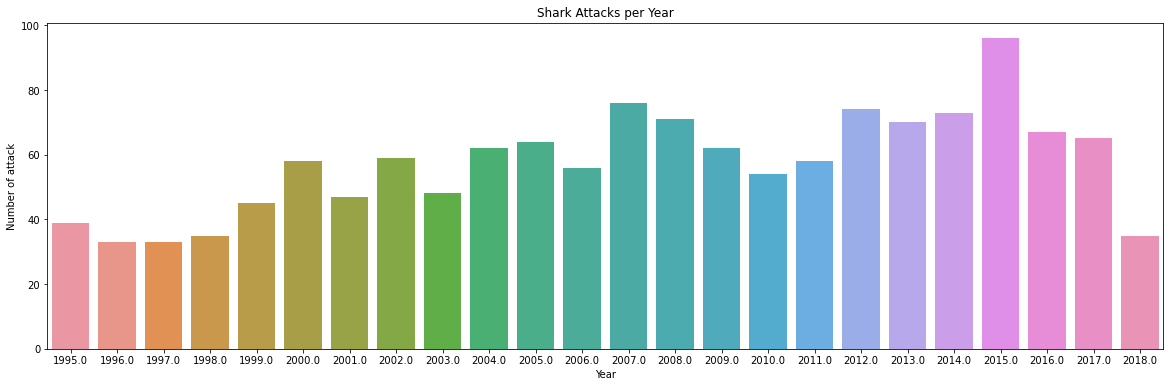

In [76]:
# Confirmed shark attack per year
year_index = sorted([i for i in confirmed_shark_attack.year.unique()])
year_values = [confirmed_shark_attack[confirmed_shark_attack.year==i]['year'].count() for i in year_index]
fig,ax = plt.subplots(figsize=(20,6))
sns.barplot(x = year_index,y=year_values,ax=ax)
plt.title('Shark Attacks per Year')
plt.xlabel('Year')
plt.ylabel('Number of attack')

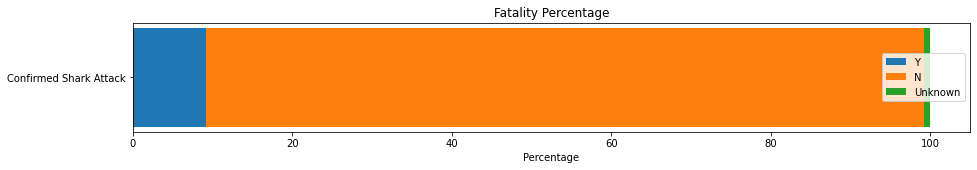

In [77]:
# Proportion of fatality for confirmed shark attacks
fatal_perc = {i: round(confirmed_shark_attack[confirmed_shark_attack.fatal==i]['fatal'].count()/confirmed_shark_attack.shape[0]*100,2) for i in list(confirmed_shark_attack['fatal'].unique())}

fig, ax = plt.subplots(figsize=(15,2))
label="Confirmed Shark Attack"
ax.barh(label, fatal_perc["Y"], label='Y')
ax.barh(label, fatal_perc["N"], left=fatal_perc["Y"],
       label='N')
ax.barh(label, fatal_perc["Unknown"], left=(fatal_perc["Y"]+ fatal_perc["N"]), label="Unknown")

ax.set_xlabel('Percentage')
ax.set_title('Fatality Percentage')
ax.legend(loc="right")

plt.show()

Text(0, 0.5, 'Number of fatal attack')

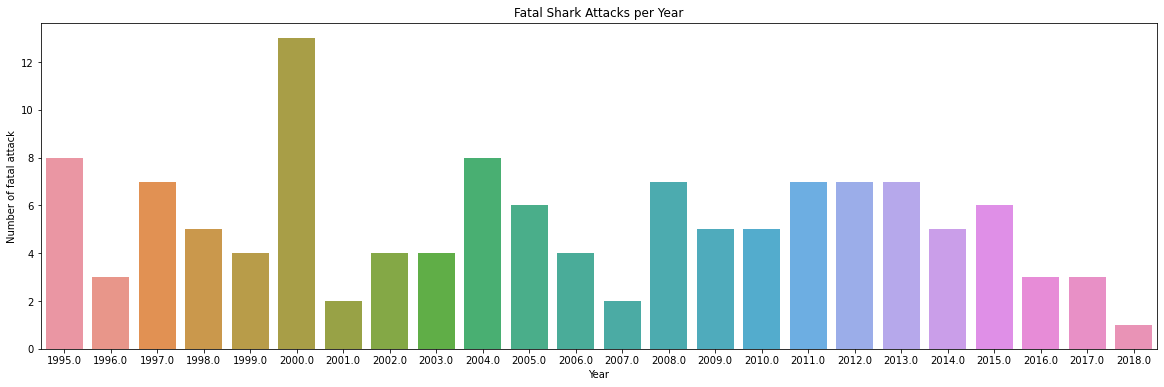

In [78]:
# Fatal shark attacks by year
fatal_attacks = confirmed_shark_attack[confirmed_shark_attack['fatal'] == 'Y']
fatal_by_year = fatal_attacks['year'].value_counts().sort_index(ascending = True) 
fig,ax = plt.subplots(figsize=(20,6))
sns.barplot(x = fatal_by_year.index,y=fatal_by_year.values.tolist(),ax=ax)
plt.title('Fatal Shark Attacks per Year')
plt.xlabel('Year')
plt.ylabel('Number of fatal attack')

##### Fatality and Sex

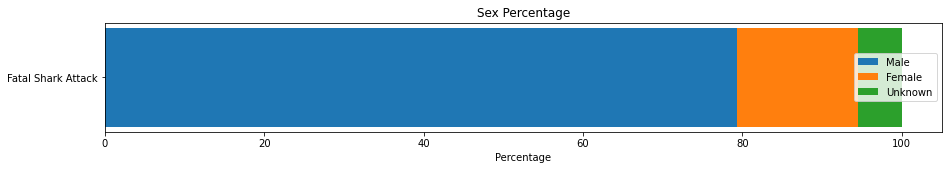

In [79]:
sex_perc = {i: round(fatal_attacks[fatal_attacks.sex==i]['sex'].count()/fatal_attacks.shape[0]*100,2) for i in list(fatal_attacks['sex'].unique())}

fig, ax = plt.subplots(figsize=(15,2))
label="Fatal Shark Attack"
ax.barh(label, sex_perc["M"], label='Male')
ax.barh(label, sex_perc["F"], left=sex_perc["M"],
       label='Female')
ax.barh(label, sex_perc["Unknown"], left=(sex_perc["M"]+ sex_perc["F"]), label="Unknown")

ax.set_xlabel('Percentage')
ax.set_title('Sex Percentage')
ax.legend(loc="right")

plt.show()

##### Fatality and Activities

Text(0, 0.5, 'Activity')

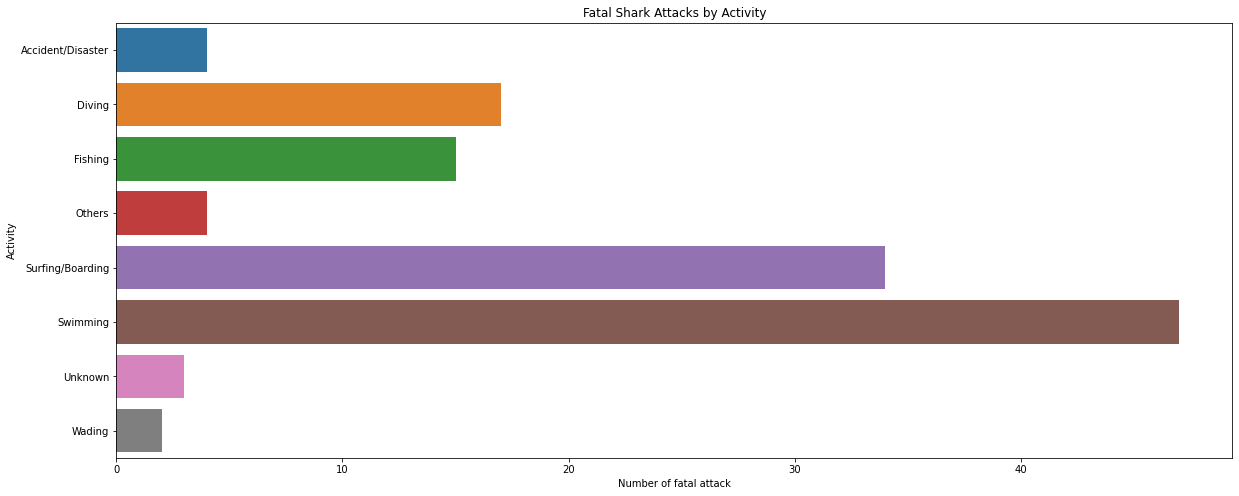

In [80]:
# Fatal shark attacks by activity
fatal_activity = fatal_attacks['activity'].value_counts().sort_index(ascending = True) 
fig,ax = plt.subplots(figsize=(20,8))
sns.barplot(x = fatal_activity.values.tolist(),y=fatal_activity.index)
plt.title('Fatal Shark Attacks by Activity')
plt.xlabel('Number of fatal attack')
plt.ylabel('Activity')

##### Fatality and Type

Text(0, 0.5, 'Type')

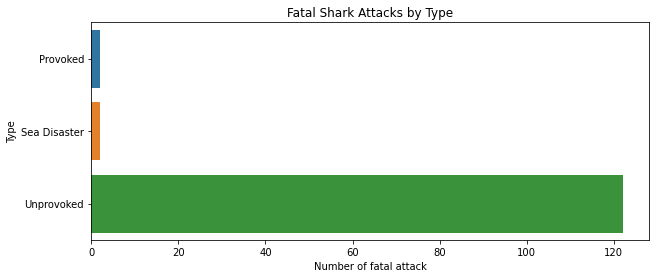

In [81]:
# Fatal shark attacks by type
fatal_type = fatal_attacks['type'].value_counts().sort_index(ascending = True) 
fig,ax = plt.subplots(figsize=(10,4))
sns.barplot(x = fatal_type.values.tolist(),y=fatal_type.index)
plt.title('Fatal Shark Attacks by Type')
plt.xlabel('Number of fatal attack')
plt.ylabel('Type')

##### Fatality and Species

Text(0, 0.5, 'Species')

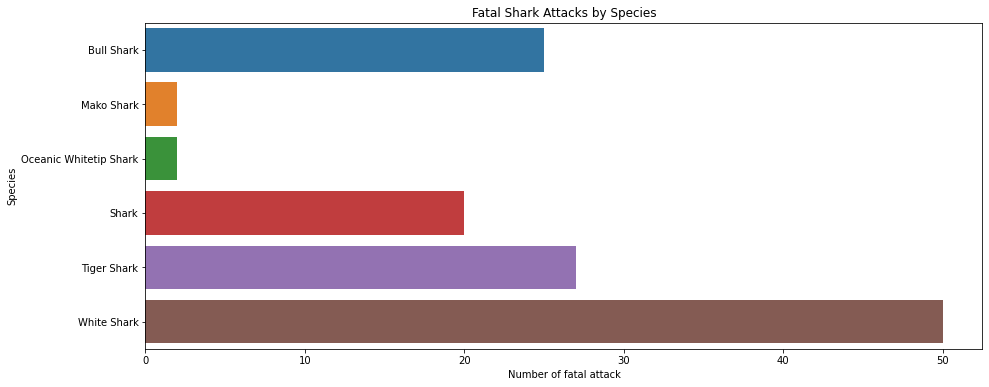

In [82]:
# Fatal shark attacks by species
fatal_species = fatal_attacks['species'].value_counts().sort_index(ascending = True) 
fig,ax = plt.subplots(figsize=(15,6))
sns.barplot(x = fatal_species.values.tolist(),y=fatal_species.index)
plt.title('Fatal Shark Attacks by Species')
plt.xlabel('Number of fatal attack')
plt.ylabel('Species')

Text(0, 0.5, 'Number of fatal attack')

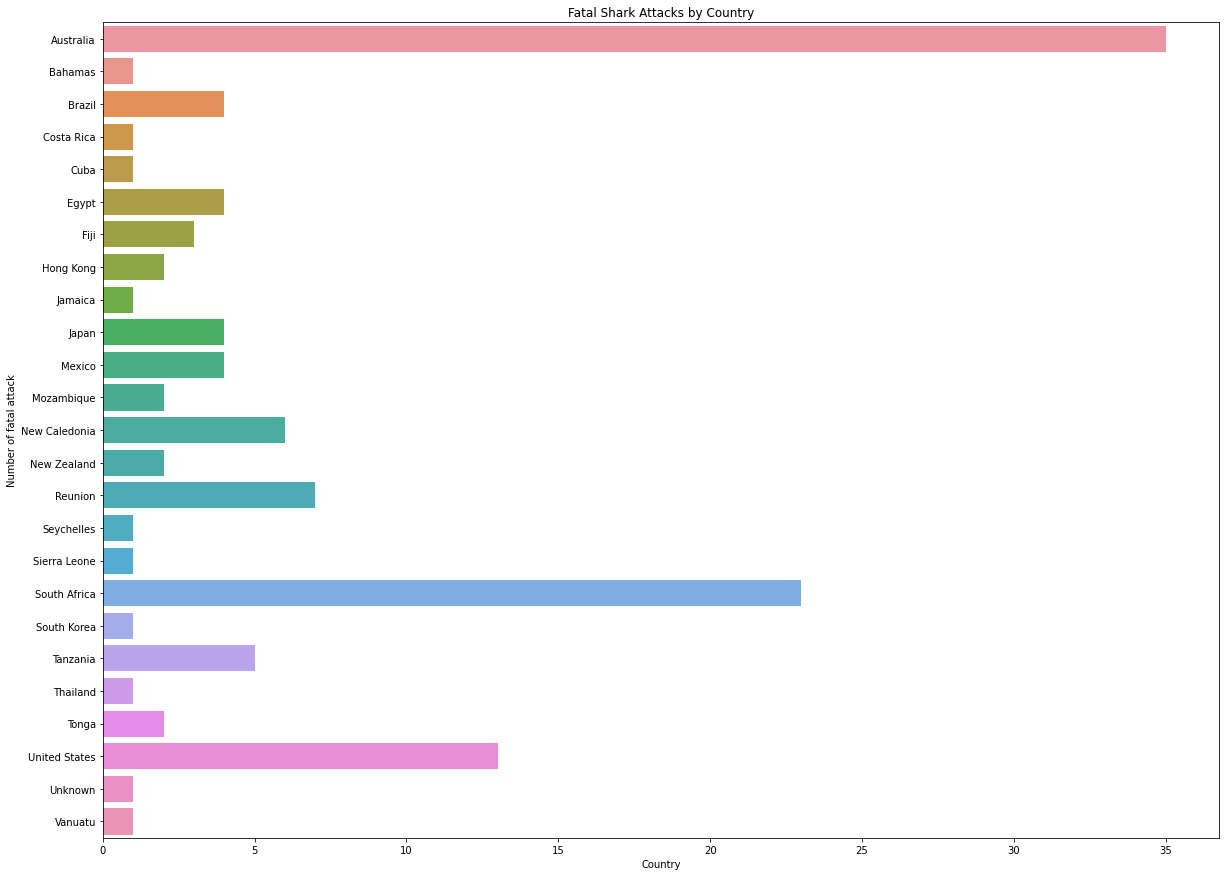

In [83]:
# Fatal shark attacks by country
fatal_country = fatal_attacks['country'].value_counts().sort_index(ascending = True) 
fig,ax = plt.subplots(figsize=(20,15))
sns.barplot(x =fatal_country.values.tolist(),y=fatal_country.index,ax=ax)
plt.title('Fatal Shark Attacks by Country')
plt.xlabel('Country')
plt.ylabel('Number of fatal attack')

In [84]:
df.to_csv('work.csv')